<a href="https://www.kaggle.com/code/phillipgregory1994/popular-spotify-songs-eda?scriptVersionId=167753273" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # For visualisations
import seaborn as sns # For visualisations
import plotly.express as px # For visualisations

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-music/Popular_Spotify_Songs.csv


## Key Features
* track_name: Name of the song
* artist(s)_name: Name of the artist(s) of the song
* artist_count: Number of artists contributing to the song
* released_year: Year when the song was released
* released_month: Month when the song was released
* released_day: Day of the month when the song was released
* in_spotify_playlists: Number of Spotify playlists the song is included in
* in_spotify_charts: Presence and rank of the song on Spotify charts
* streams: Total number of streams on Spotify
* in_apple_playlists: Number of Apple Music playlists the song is included in
* in_apple_charts: Presence and rank of the song on Apple Music charts
* in_deezer_playlists: Number of Deezer playlists the song is included in
* in_deezer_charts: Presence and rank of the song on Deezer charts
* in_shazam_charts: Presence and rank of the song on Shazam charts
* bpm: Beats per minute, a measure of song tempo
* key: Key of the song
* mode: Mode of the song (major or minor)
* danceability_%: Percentage indicating how suitable the song is for dancing
* valence_%: Positivity of the song's musical content
* energy_%: Perceived energy level of the song
* acousticness_%: Amount of acoustic sound in the song
* instrumentalness_%: Amount of instrumental content in the song
* liveness_%: Presence of live performance elements
* speechiness_%: Amount of spoken words in the song

### Importing the Data and Preliminary Investigation
Initial exploration will involve:
* Checking the number of records and features in the data
* Checking the data types of each feature and ensure these are appropriate
* Generating a table of summary statistics
* Checking for duplicated records
* Checking for null values and addressing these appropriately

In [2]:
address = '/kaggle/input/spotify-music/Popular_Spotify_Songs.csv'
df = pd.read_csv(address, encoding='latin-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
# Check the dataframe shape
df.shape

(953, 24)

In [4]:
# Check the columns and data types
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [5]:
# Streams should be numeric. Investigate this and convert to int64.
df.streams.unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

In [6]:
df[df.streams == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


In [7]:
# Drop record 574 and convert the remaining stream data to int64
df.drop(index=574, inplace=True)
df.streams = df.streams.astype('int64')

In [8]:
# Check for null values
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [9]:
# Descriptive overview of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,952.0,1.556723e+00,8.933314e-01,1.0,1.000000e+00,1.0,2.000000e+00,8.000000e+00
released_year,952.0,2.018289e+03,1.101140e+01,1930.0,2.020000e+03,2022.0,2.022000e+03,2.023000e+03
released_month,952.0,6.038866e+00,3.564571e+00,1.0,3.000000e+00,6.0,9.000000e+00,1.200000e+01
released_day,952.0,1.394433e+01,9.197223e+00,1.0,6.000000e+00,13.0,2.200000e+01,3.100000e+01
in_spotify_playlists,952.0,5.202565e+03,7.901401e+03,31.0,8.745000e+02,2216.5,5.573750e+03,5.289800e+04
in_spotify_charts,952.0,1.202206e+01,1.958241e+01,0.0,0.000000e+00,3.0,1.600000e+01,1.470000e+02
streams,952.0,5.141374e+08,5.668569e+08,2762.0,1.416362e+08,290530915.0,6.738690e+08,3.703895e+09
in_apple_playlists,952.0,6.786660e+01,8.647059e+01,0.0,1.300000e+01,34.0,8.800000e+01,6.720000e+02
in_apple_charts,952.0,5.196324e+01,5.062885e+01,0.0,7.000000e+00,38.5,8.700000e+01,2.750000e+02
in_deezer_charts,952.0,2.669118e+00,6.038152e+00,0.0,0.000000e+00,0.0,2.000000e+00,5.800000e+01


In [10]:
# Check for duplicated records
df.duplicated().value_counts()

False    952
Name: count, dtype: int64

### Data Cleaning
* Investigate the columns that have null values

In [11]:
# As the key column is categorical and in_shazam_charts is discrete numeric, impute the mode
key_mode = df.key.mode()[0]
shazam_mode = df.in_shazam_charts.mode()[0]

# Replace nulls with the respective mode
df.key = df.key.fillna(value=key_mode)
df.in_shazam_charts = df.in_shazam_charts.fillna(value=shazam_mode)

# Recheck for null values
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

### Exploratory Data Analysis (EDA)
This section employs a variety of visualisations to derive insights from the data such as:
* What are the most streamed songs on Spotify?
* What is the most streamed song for each song release year?
* How are song features distributed such as 'bpm' and 'danceability'?
* How do song features correlate with streaming figures?

In [12]:
# Top 'n' overall most streamed songs on Spotify and the related artist
n=10

top_n_streamed_songs = df.sort_values(by='streams', ascending=False)[:n]

fig = px.bar(data_frame=top_n_streamed_songs,
            x='track_name', y='streams', 
             color='artist(s)_name')

fig.update_layout(title='Top {} Overall Most Streamed Songs on Spotify'.format(n),
                 xaxis_title='Song Title',
                 yaxis_title='Number of Streams (Billions)')

fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


* Based on this data, the most popular song on Spotify is 'Blinding Lights' by 'The Weeknd'

In [13]:
# What is the most streamed song for each song release year?
release_years = df.released_year.unique()
indexes = []

for i in release_years:
    indexes.append(df[df.released_year == i].streams.idxmax())
    
most_streamed_each_year = df[['track_name', 'released_year', 'streams']].loc[indexes]

fig1 = px.bar(data_frame=most_streamed_each_year,
             x='released_year', y='streams',
             color='track_name')

fig1.update_layout(title='Most Streamed Song for each Release Year',
                  xaxis_title='Year',
                  yaxis_title='Number of Streams (Billions)')

fig1.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



array([[<Axes: title={'center': 'bpm'}>,
        <Axes: title={'center': 'danceability_%'}>,
        <Axes: title={'center': 'valence_%'}>],
       [<Axes: title={'center': 'energy_%'}>,
        <Axes: title={'center': 'acousticness_%'}>,
        <Axes: title={'center': 'instrumentalness_%'}>],
       [<Axes: title={'center': 'liveness_%'}>,
        <Axes: title={'center': 'speechiness_%'}>, <Axes: >]],
      dtype=object)

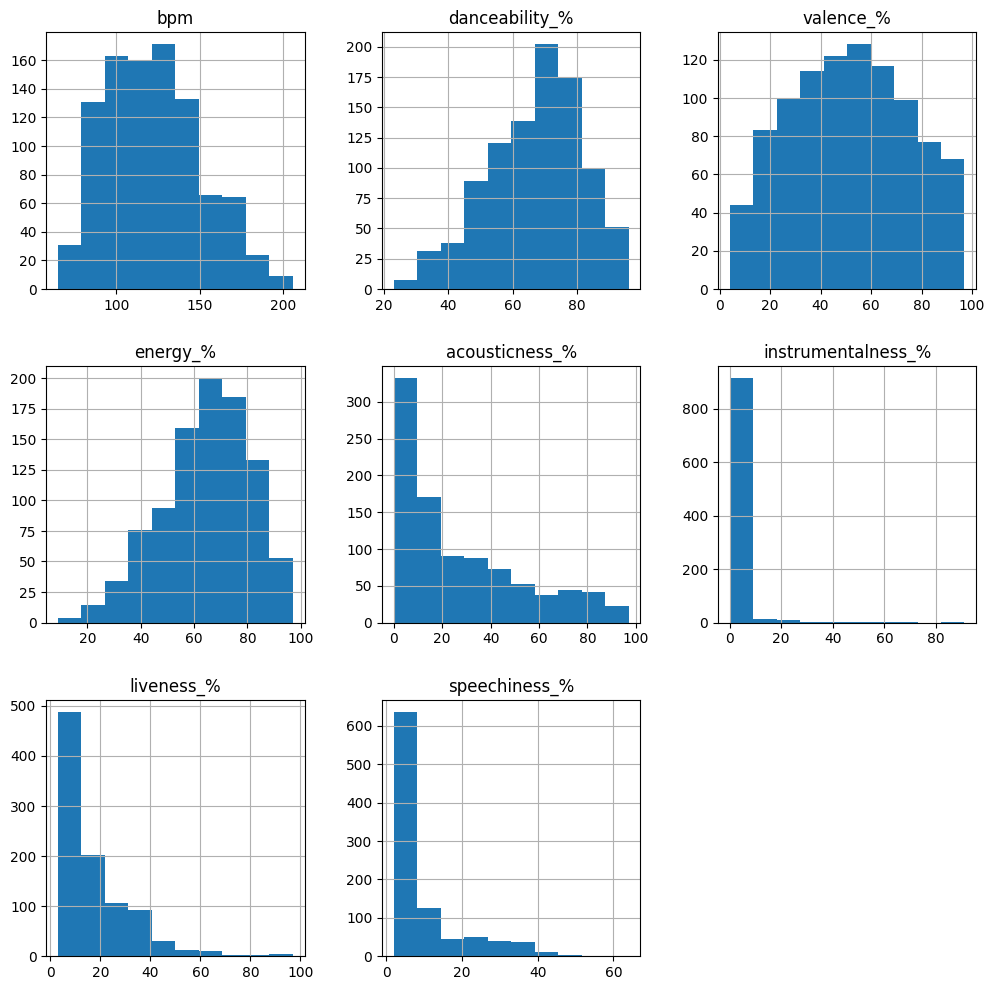

In [14]:
# How are the various song attributes distributed?
song_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%',
'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

df[song_features].hist(figsize=(12,12))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

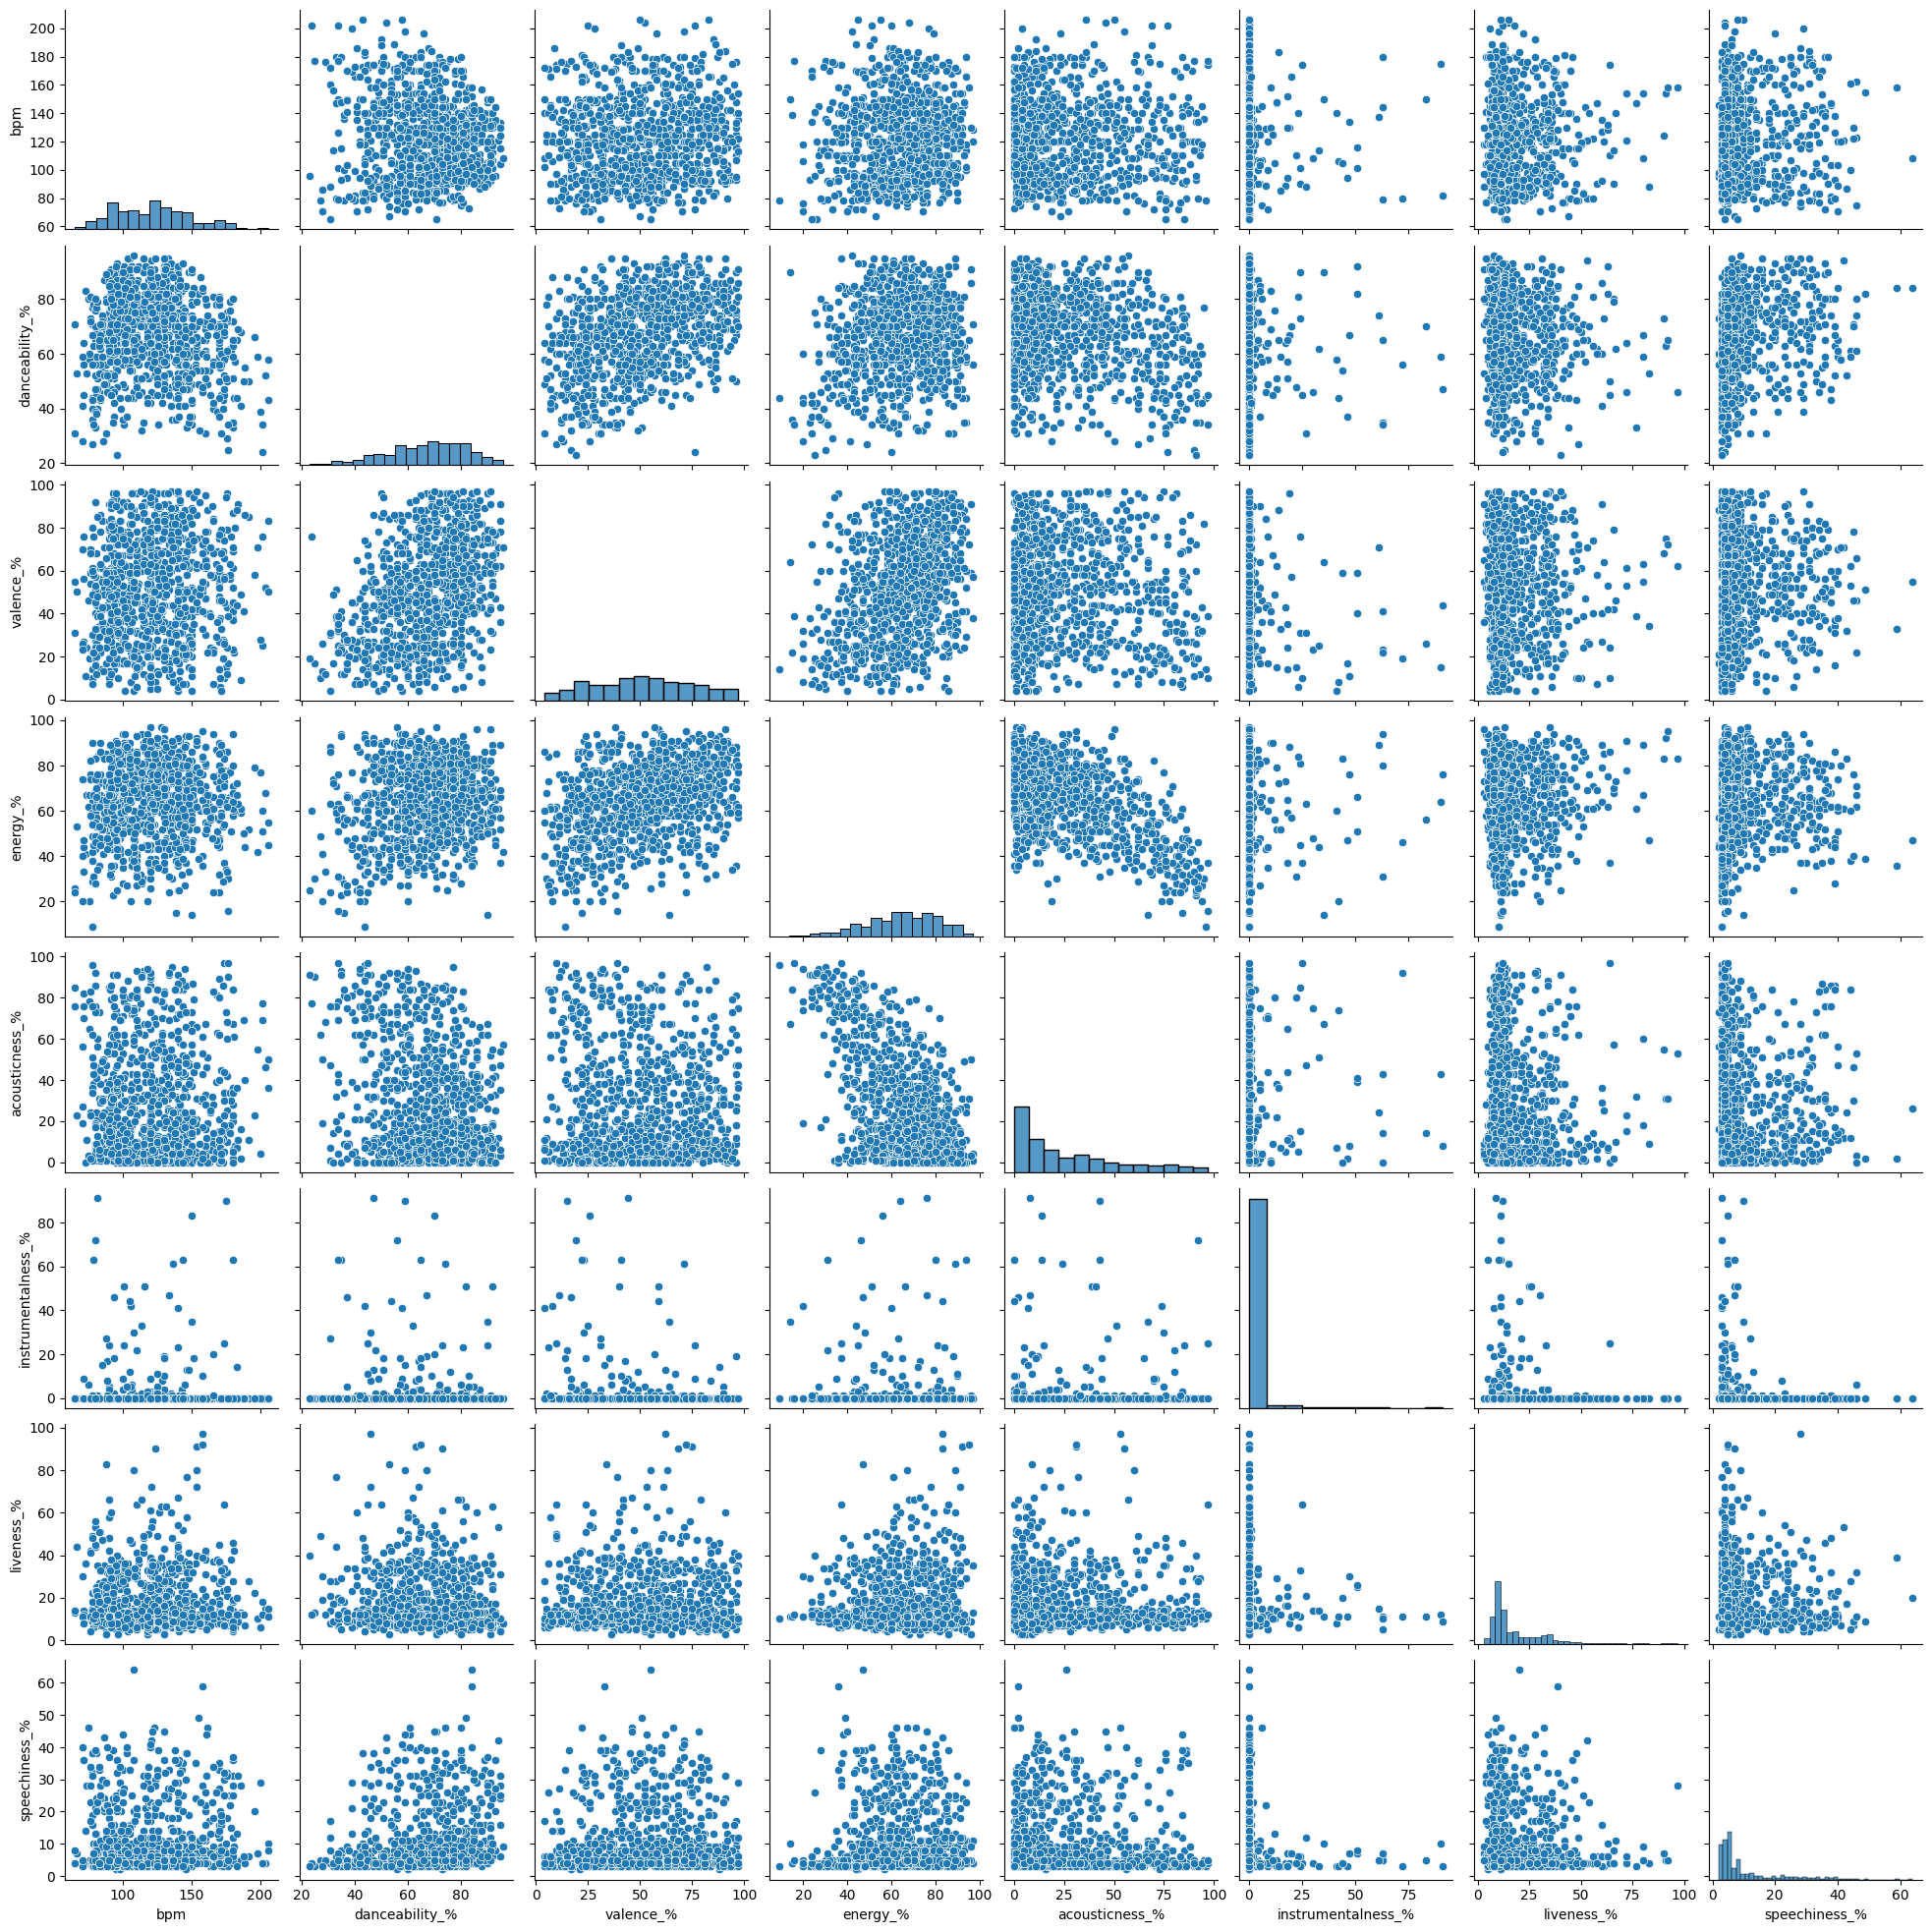

In [15]:
# Create a pairplot to visualise correlations in song features and streaming figures

df.replace({np.inf:np.nan, -np.inf:np.nan}, inplace=True) # Trying to get round the deprecation error
sns.pairplot(df[song_features])

* Some song attributes appear positively correlated such as valence with energy and danceability.
* There also appears to be a strong negative correlation between energy and accousticness.
* Neither of these correlations are surprising and are in line with what you would expect.

<Axes: >

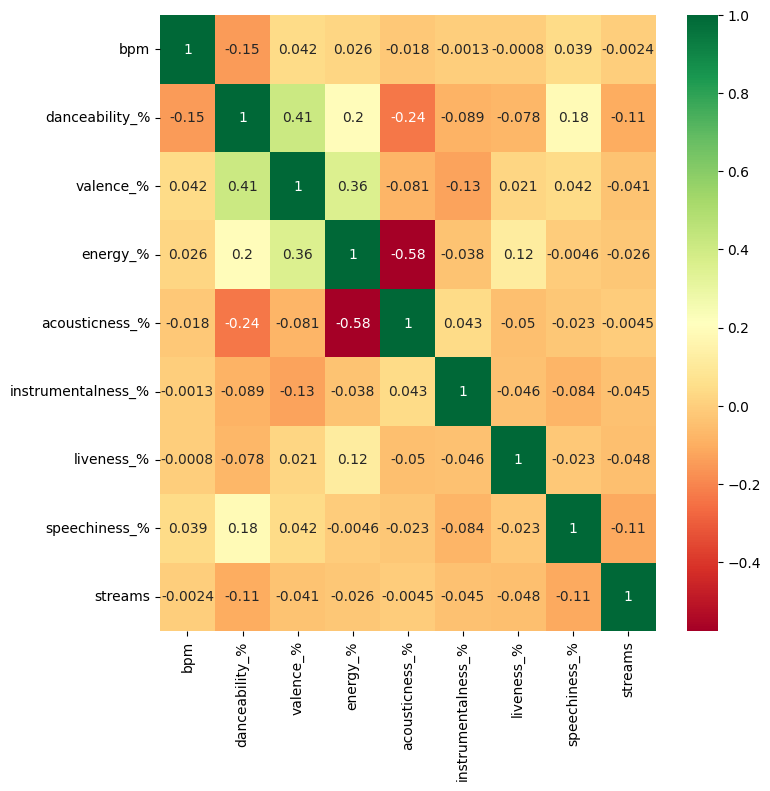

In [16]:
# Check correlation coefficients
song_features_streams = ['bpm', 'danceability_%', 'valence_%', 'energy_%',
'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams']
plt.figure(figsize=(8,8))
sns.heatmap(df[song_features_streams].corr(), annot=True, cmap='RdYlGn')

In [17]:
df[song_features_streams].corr()['streams'][:-1]

bpm                  -0.002438
danceability_%       -0.105457
valence_%            -0.040831
energy_%             -0.026051
acousticness_%       -0.004485
instrumentalness_%   -0.044902
liveness_%           -0.048337
speechiness_%        -0.112333
Name: streams, dtype: float64

Although some song attributes are correlated between themselves, none of the song attributes have a clear correlation with streaming figures.

#### Thank you for viewing this! If you found it interesting or useful, please like this notebook :) 